In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset\cataract\0_left.jpg
dataset\cataract\103_left.jpg
dataset\cataract\1062_right.jpg
dataset\cataract\1083_left.jpg
dataset\cataract\1084_right.jpg
dataset\cataract\1102_left.jpg
dataset\cataract\1102_right.jpg
dataset\cataract\1115_left.jpg
dataset\cataract\1126_right.jpg
dataset\cataract\112_right.jpg
dataset\cataract\1144_left.jpg
dataset\cataract\1144_right.jpg
dataset\cataract\1164_left.jpg
dataset\cataract\1167_right.jpg
dataset\cataract\119_left.jpg
dataset\cataract\1285_left.jpg
dataset\cataract\1415_left.jpg
dataset\cataract\1415_right.jpg
dataset\cataract\1435_left.jpg
dataset\cataract\1444_left.jpg
dataset\cataract\1452_left.jpg
dataset\cataract\1454_right.jpg
dataset\cataract\1456_left.jpg
dataset\cataract\1460_right.jpg
dataset\cataract\1468_left.jpg
dataset\cataract\1483_right.jpg
dataset\cataract\1484_left.jpg
dataset\cataract\1484_right.jpg
dataset\cataract\1490_right.jpg
dataset\cataract\188_right.jpg
dataset\cataract\1968_left.jpg
dataset\cataract\1987_left.jpg
d

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
import os
print(os.listdir("dataset"))

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [7]:
img_dir='dataset'

## choosing not to use these transformations, assuming we will set a standard quality of images when using the model
                                       transforms.ColorJitter(0.05),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(20),

In [8]:
train_transforms = transforms.Compose([transforms.Resize((120, 120)),
                                       transforms.ToTensor(), 
                                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                                     ])

In [9]:
train_set = datasets.ImageFolder(img_dir, transform=train_transforms)

In [10]:
test_size = 0.2

num_train = len(train_set)
indices = list(range(num_train))
np.random.shuffle(indices)

test_split = int(np.floor((test_size) * num_train))
test_index, train_index = indices[:test_split - 1], indices[test_split - 1:]

train_sampler = SubsetRandomSampler(train_index)
test_sampler = SubsetRandomSampler(test_index)

train_loader = DataLoader(train_set, sampler=train_sampler, batch_size=104)
test_loader = DataLoader(train_set, sampler=test_sampler, batch_size=58)
print("Images in Test set: {}\nImages in Train set: {}".format(len(test_index), len(train_index)))

Images in Test set: 842
Images in Train set: 3375


In [11]:
classes=['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


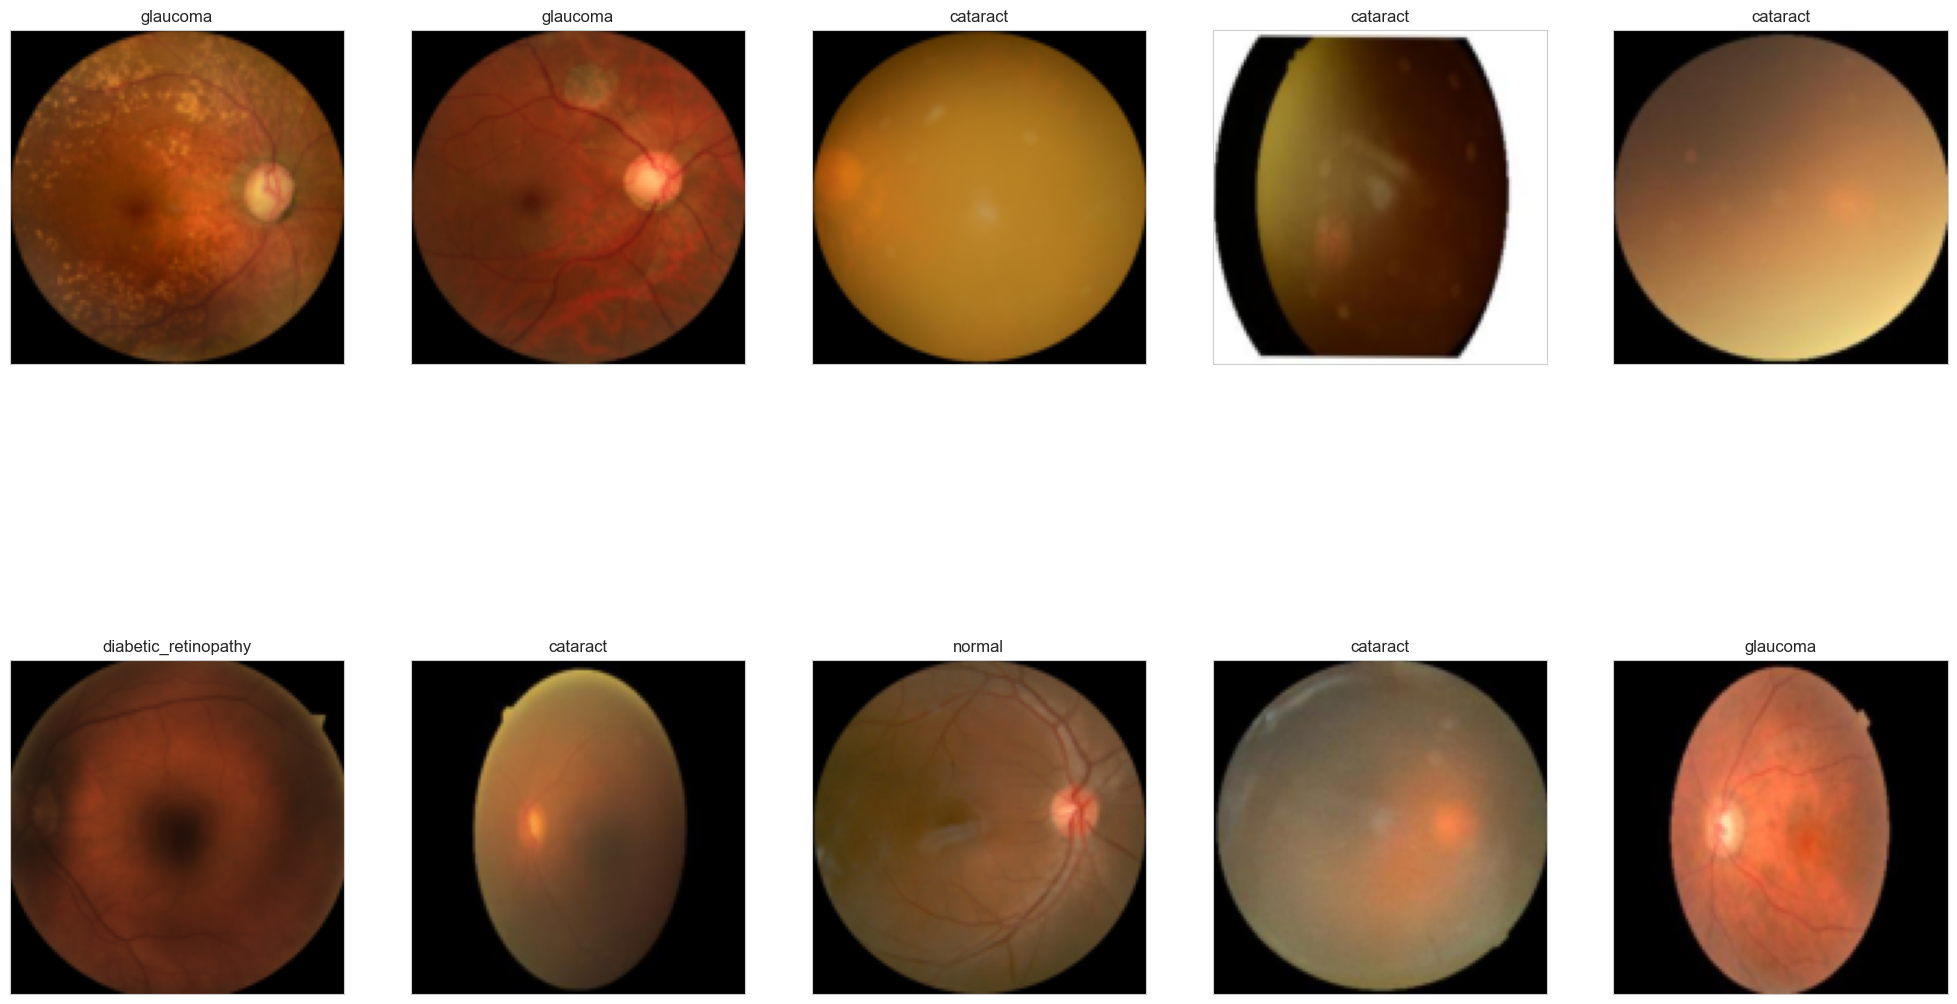

In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(25, 15))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title=classes[labels[i]])
    imshow(images[i])
plt.show()

In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([104, 3, 120, 120])
torch.Size([3, 120, 120])
1


In [14]:
import torch
from torch.utils.data import DataLoader

# Assuming you have a train dataset and DataLoader defined


# Let's try to access a batch from the DataLoader
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next() instead of .next() to get the next batch

print(images.shape)
print(labels.shape)  # Assuming labels are also tensors

# Accessing a single image and its label
image_index = 1  # Change as needed
single_image = images[image_index]
single_label = labels[image_index].item()

print("Shape of the single image:", single_image.shape)
print("Label of the single image:", single_label)


torch.Size([104, 3, 120, 120])
torch.Size([104])
Shape of the single image: torch.Size([3, 120, 120])
Label of the single image: 0


In [15]:
num_classes = 4

In [16]:
from torchvision import models

In [64]:
resnet18 = models.resnet18()

In [65]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [66]:
in_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(in_features, num_classes)

In [67]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [68]:
def evaluation(dataloader, model):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred==labels).sum().item()
  return 100 * correct/ total

In [69]:
resnet18 = resnet18.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet18.parameters(), lr=0.005, momentum=0.9)

In [70]:
import copy

In [71]:
len(train_loader)

33

Min loss 1.40
Iteration: 0/33, Loss: 1.40
Min loss 1.35
Min loss 1.31
Min loss 1.31
Min loss 1.23
Min loss 1.15
Min loss 1.11
Min loss 1.05
Min loss 0.93
Min loss 0.91
Min loss 0.82
Epoch: 0/10, Test acc: 56.77, Train acc: 62.84
Min loss 0.80
Iteration: 0/33, Loss: 0.80
Min loss 0.79
Min loss 0.78
Min loss 0.77
Min loss 0.75
Min loss 0.70
Min loss 0.65
Min loss 0.63
Min loss 0.60
Min loss 0.51
Epoch: 1/10, Test acc: 68.53, Train acc: 73.51
Iteration: 0/33, Loss: 0.60
Epoch: 2/10, Test acc: 70.67, Train acc: 76.44
Min loss 0.49
Iteration: 0/33, Loss: 0.49
Min loss 0.49
Min loss 0.48
Min loss 0.47
Min loss 0.46
Min loss 0.42
Min loss 0.42
Min loss 0.41
Epoch: 3/10, Test acc: 76.96, Train acc: 81.21
Iteration: 0/33, Loss: 0.42
Min loss 0.40
Min loss 0.38
Min loss 0.33
Epoch: 4/10, Test acc: 80.40, Train acc: 84.53
Min loss 0.27
Iteration: 0/33, Loss: 0.27
Min loss 0.26
Epoch: 5/10, Test acc: 81.47, Train acc: 88.00
Iteration: 0/33, Loss: 0.35
Min loss 0.25
Min loss 0.25
Epoch: 6/10, Test 

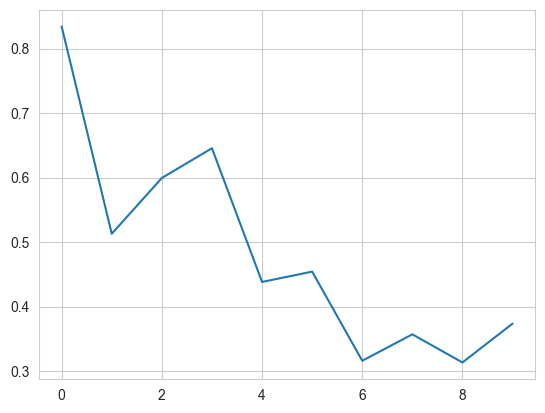

In [72]:
loss_epoch_arr = []
max_epochs = 10

min_loss = 1000

n_iters = len(train_loader)

for epoch in range(max_epochs):

  for i, data in enumerate(train_loader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = resnet18(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(resnet18.state_dict())
      print('Min loss %0.2f' % min_loss)

    if i % 100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

    del inputs, labels, outputs
    torch.cuda.empty_cache()

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
      epoch, max_epochs,
      evaluation(test_loader, resnet18), evaluation(train_loader, resnet18)
  ))

plt.plot(loss_epoch_arr)
plt.show()

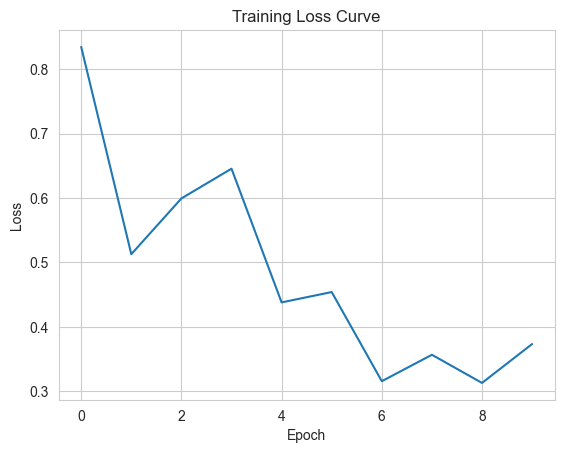

In [88]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(loss_epoch_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


In [73]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(test_loader,resnet18), evaluation(train_loader,resnet18)))

Test acc: 84.20, Train acc: 96.92


Confusion Matrix:
[[180   0  11  10]
 [  1 203   0   0]
 [ 23   0 169  30]
 [ 21   0  29 165]]


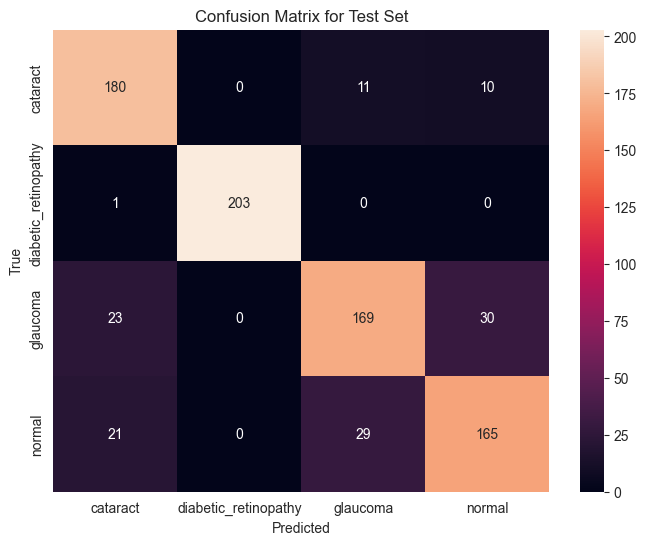

In [87]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np


# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Evaluation on the test set
resnet18.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linecolor='red',
            xticklabels=test_loader.classes, yticklabels=test_loader.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set')
plt.show()


In [74]:
torch.save(resnet18.state_dict(), "resnet18-model.pt")

## CustomCNN

In [ ]:
# !pip install --upgrade keras

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets

# Defining CNN architecture
class CustomCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 15 * 15, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 256 * 15 * 15)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Setting device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((120, 120)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [0]:

# Load dataset
img_dir = 'dataset'
dataset = datasets.ImageFolder(img_dir, transform=transform)

# Define data loaders
batch_size = 64
test_split = 0.2
shuffle_dataset = True

In [31]:

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(test_split * dataset_size))
if shuffle_dataset:
    np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]

# Creating data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

In [ ]:

# Initialize the model
model = CustomCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:

# Train the model
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

In [ ]:

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Validation Accuracy: {accuracy:.2%}")
# Define the path where you want to save the model
model_path = "custom_cnn_model.pth"

# Save the entire model
torch.save(model, model_path)

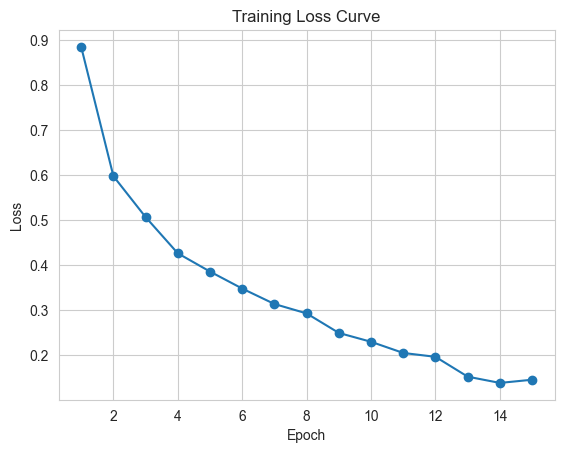

In [84]:
import matplotlib.pyplot as plt

# Loss values for each epoch,took too long to fit, couldn't compile again before submission
losses = [0.8850, 0.5977, 0.5067, 0.4262, 0.3856, 0.3478, 0.3135, 0.2926, 0.2492, 0.2295, 0.2047, 0.1961, 0.1520, 0.1381, 0.1452]

# Plot the loss curve
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


In [26]:
model_path = "custom_cnn_model.pth"
# Load the saved model
loaded_model = torch.load(model_path)
